### Part 3 (real datasets experiments)

In [36]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
sns.set(rc={'figure.figsize':(9,7)})

In [27]:
#load data to pd dataframe
data = load_breast_cancer()
df_breast = pd.DataFrame(data.data, columns=data.feature_names)
df_breast['target'] = data.target
#here all data is numeric, no categorical data

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [34]:
#check various unique values in each column
for col in df_breast.columns:
    print(col, len(df_breast[col].unique()))

mean radius 456
mean texture 479
mean perimeter 522
mean area 539
mean smoothness 474
mean compactness 537
mean concavity 537
mean concave points 542
mean symmetry 432
mean fractal dimension 499
radius error 540
texture error 519
perimeter error 533
area error 528
smoothness error 547
compactness error 541
concavity error 533
concave points error 507
symmetry error 498
fractal dimension error 545
worst radius 457
worst texture 511
worst perimeter 514
worst area 544
worst smoothness 411
worst compactness 529
worst concavity 539
worst concave points 492
worst symmetry 500
worst fractal dimension 535
target 2


In [28]:
# check if there are any missing values
df_breast.isnull().sum() #no missing values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [29]:
#removing collinear variables
cor_matrix = df_breast.corr().abs()
upper_tri = cor_matrix.where(np.triu(cor_matrix, k=1).astype(np.bool))
# drop columns with correlation > 0.9
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
print(len(to_drop)) # 10 found to be dropped
df_breast_without_collinear = df_breast.drop(to_drop, axis=1)
print(df_breast_without_collinear.shape) 

10
(569, 21)


##### Other methods

In [37]:
def metrics_LDA(X_train, X_test, y_train, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    prec=precision_score(y_test, y_pred)
    rec=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    return acc, prec, rec, f1

In [42]:
def metrics_QDA(X_train, X_test, y_train, y_test):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    prec=precision_score(y_test, y_pred)
    rec=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    return acc, prec, rec, f1

In [43]:
def metrics_KNN(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    prec=precision_score(y_test, y_pred)
    rec=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    return acc, prec, rec, f1

In [38]:
def metrics_IRLS(X_train, X_test, y_train, y_test):
    return 0,0,0,0

In [39]:
def metrics_IRLS_interactions(X_train, X_test, y_train, y_test):
    return 0,0,0,0

##### Comparison between methods

In [44]:
#for each experiment, split data into train and test sets with different seed
def run_experiments(X, y, iterations=10):
    acc_all=np.zeros((iterations, 5))
    prec_all=np.zeros((iterations, 5))
    rec_all=np.zeros((iterations, 5))
    f1_all=np.zeros((iterations, 5))
    for i in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        acc_all[i, 0], prec_all[i, 0], rec_all[i, 0], f1_all[i, 0] = metrics_LDA(X_train, X_test, y_train, y_test)
        acc_all[i, 1], prec_all[i, 1], rec_all[i, 1], f1_all[i, 1] = metrics_QDA(X_train, X_test, y_train, y_test)
        acc_all[i, 2], prec_all[i, 2], rec_all[i, 2], f1_all[i, 2] = metrics_KNN(X_train, X_test, y_train, y_test)
        acc_all[i, 3], prec_all[i, 3], rec_all[i, 3], f1_all[i, 3] = metrics_IRLS(X_train, X_test, y_train, y_test)
        acc_all[i, 4], prec_all[i, 4], rec_all[i, 4], f1_all[i, 4] = metrics_IRLS_interactions(X_train, X_test, y_train, y_test)
    return acc_all, prec_all, rec_all, f1_all

In [45]:
acc_all_brest, prec_all_breast, rec_all_breast, f1_all_breast = run_experiments(df_breast_without_collinear.drop('target', axis=1), df_breast_without_collinear['target'])

[Text(0, 0, 'LDA'),
 Text(1, 0, 'QDA'),
 Text(2, 0, 'KNN'),
 Text(3, 0, 'IRLS'),
 Text(4, 0, 'IRLS_interactions')]

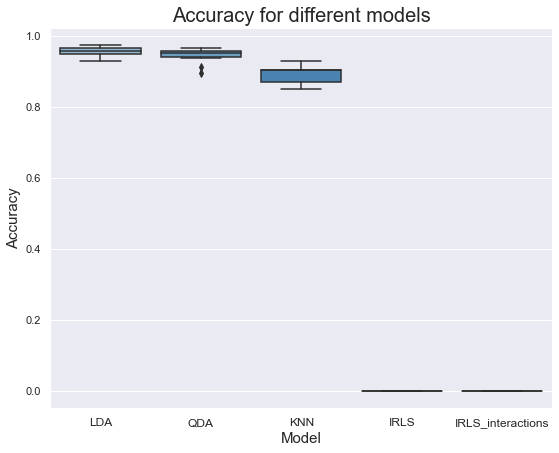

In [49]:
fig_auc=sns.boxplot(data=acc_all_brest, palette='Blues_d')
fig_auc.set_title('Accuracy for different models', fontsize=20)
fig_auc.set_ylabel('Accuracy', fontsize=15)
fig_auc.set_xlabel('Model', fontsize=15)
fig_auc.set_xticklabels(['LDA', 'QDA', 'KNN', 'IRLS', 'IRLS_interactions'], fontsize=12)

[Text(0, 0, 'LDA'),
 Text(1, 0, 'QDA'),
 Text(2, 0, 'KNN'),
 Text(3, 0, 'IRLS'),
 Text(4, 0, 'IRLS_interactions')]

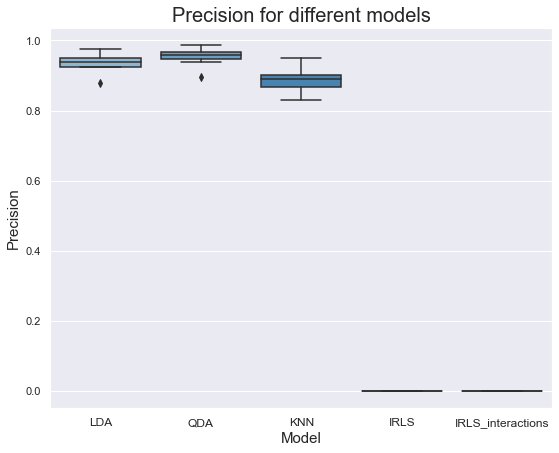

In [50]:
fig_prec=sns.boxplot(data=prec_all_breast, palette='Blues_d')
fig_prec.set_title('Precision for different models', fontsize=20)
fig_prec.set_ylabel('Precision', fontsize=15)
fig_prec.set_xlabel('Model', fontsize=15)
fig_prec.set_xticklabels(['LDA', 'QDA', 'KNN', 'IRLS', 'IRLS_interactions'], fontsize=12)

[Text(0, 0, 'LDA'),
 Text(1, 0, 'QDA'),
 Text(2, 0, 'KNN'),
 Text(3, 0, 'IRLS'),
 Text(4, 0, 'IRLS_interactions')]

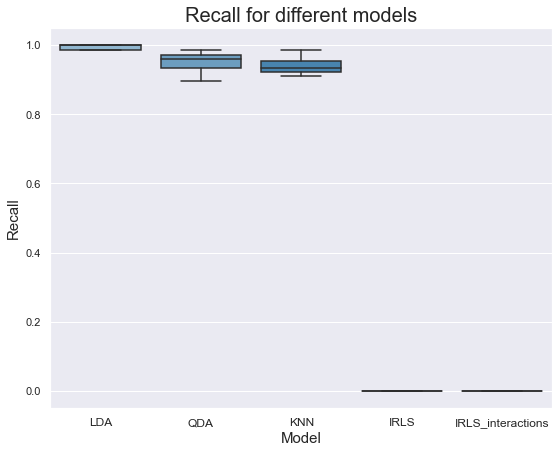

In [51]:
fig_recall=sns.boxplot(data=rec_all_breast, palette='Blues_d')
fig_recall.set_title('Recall for different models', fontsize=20)
fig_recall.set_ylabel('Recall', fontsize=15)
fig_recall.set_xlabel('Model', fontsize=15)
fig_recall.set_xticklabels(['LDA', 'QDA', 'KNN', 'IRLS', 'IRLS_interactions'], fontsize=12)

[Text(0, 0, 'LDA'),
 Text(1, 0, 'QDA'),
 Text(2, 0, 'KNN'),
 Text(3, 0, 'IRLS'),
 Text(4, 0, 'IRLS_interactions')]

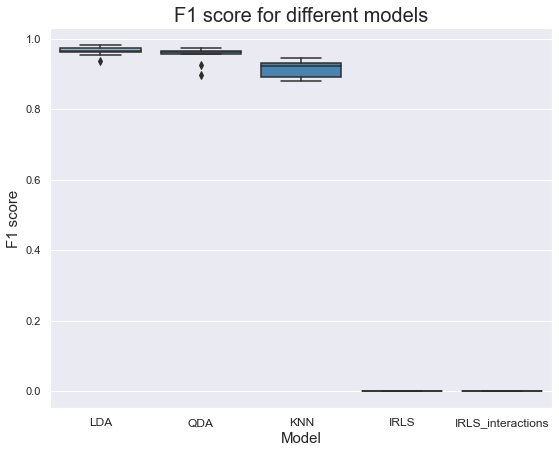

In [52]:
fig_f1=sns.boxplot(data=f1_all_breast, palette='Blues_d')
fig_f1.set_title('F1 score for different models', fontsize=20)
fig_f1.set_ylabel('F1 score', fontsize=15)
fig_f1.set_xlabel('Model', fontsize=15)
fig_f1.set_xticklabels(['LDA', 'QDA', 'KNN', 'IRLS', 'IRLS_interactions'], fontsize=12)

TO DO drugi dataset
dodać irls aby działało
porówniae obu irls